In [43]:
import pandas as pd

In [44]:
import numpy as np

In [45]:
import matplotlib.pyplot as plt

In [46]:
import matplotlib.ticker as ticker

In [47]:
import seaborn as sns

In [48]:
%matplotlib inline

In [49]:
balanco = pd.read_csv("balanços/JHSF3.csv", index_col=0, header=1)

In [50]:
balanco = balanco.T[::-1]

In [51]:
balanco.index = pd.to_datetime(balanco.index)

In [52]:
balanco.head(3)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,Outros Ativos Circulantes,...,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes,Adiantamento para Futuro Aumento Capital
2008-06-30,"1,448,715","720,835","212,135",0,"508,700",0,0,0,0,0,...,"905,807","705,782",0,0,"65,152","134,873",0,0,0,0
2008-09-30,"1,633,230","797,019","217,884",0,"579,135",0,0,0,0,0,...,"942,223","705,782",0,0,"70,068","166,373",0,0,0,0
2008-12-31,"1,614,747","662,942","172,853",0,"490,089",0,0,0,0,0,...,"869,889","705,782",906,0,"161,216",0,"1,985",0,0,0


#### Convert string to int 

In [53]:
balanco = balanco.applymap(lambda x: int(x.replace(',', '')))

In [57]:
balanco.columns

Index(['Ativo Total', 'Ativo Circulante', 'Caixa e Equivalentes de Caixa',
       'Aplicações Financeiras', 'Contas a Receber', 'Estoques',
       'Ativos Biológicos', 'Tributos a Recuperar', 'Despesas Antecipadas',
       'Outros Ativos Circulantes', 'Ativo Realizável a Longo Prazo',
       'Aplicações Financeiras Avaliadas a Valor Justo',
       'Aplicações Financeiras Avaliadas ao Custo Amortizado',
       'Contas a Receber', 'Estoques', 'Ativos Biológicos',
       'Tributos Diferidos', 'Despesas Antecipadas',
       'Créditos com Partes Relacionadas', 'Outros Ativos Não Circulantes',
       'Investimentos', 'Imobilizado', 'Intangível', 'Diferido',
       'Passivo Total', 'Passivo Circulante',
       'Obrigações Sociais e Trabalhistas', 'Fornecedores',
       'Obrigações Fiscais', 'Empréstimos e Financiamentos',
       'Passivos com Partes Relacionadas', 'Dividendos e JCP a Pagar',
       'Outros', 'Provisões',
       'Passivos sobre Ativos Não-Correntes a Venda e Descontinuados',
 

In [54]:
balanco.head(3)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,Outros Ativos Circulantes,...,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes,Adiantamento para Futuro Aumento Capital
2008-06-30,1448715,720835,212135,0,508700,0,0,0,0,0,...,905807,705782,0,0,65152,134873,0,0,0,0
2008-09-30,1633230,797019,217884,0,579135,0,0,0,0,0,...,942223,705782,0,0,70068,166373,0,0,0,0
2008-12-31,1614747,662942,172853,0,490089,0,0,0,0,0,...,869889,705782,906,0,161216,0,1985,0,0,0


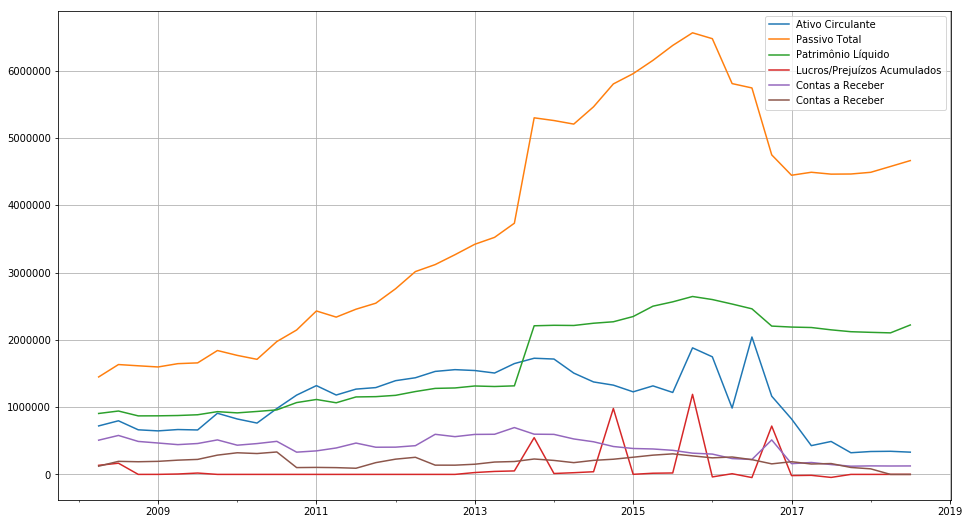

In [58]:
balanco[['Ativo Circulante', 'Passivo Total', 'Patrimônio Líquido', 'Lucros/Prejuízos Acumulados',  'Contas a Receber']].plot(figsize=(16,9), grid=True)

In [37]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '{:1.1f}B'.format(x*1e-6)
    else:
        s = '{:1.0f}M'.format(x*1e-3)
    return s

formatter_money = ticker.FuncFormatter(currency)

ValueError: not enough values to unpack (expected 3, got 2)

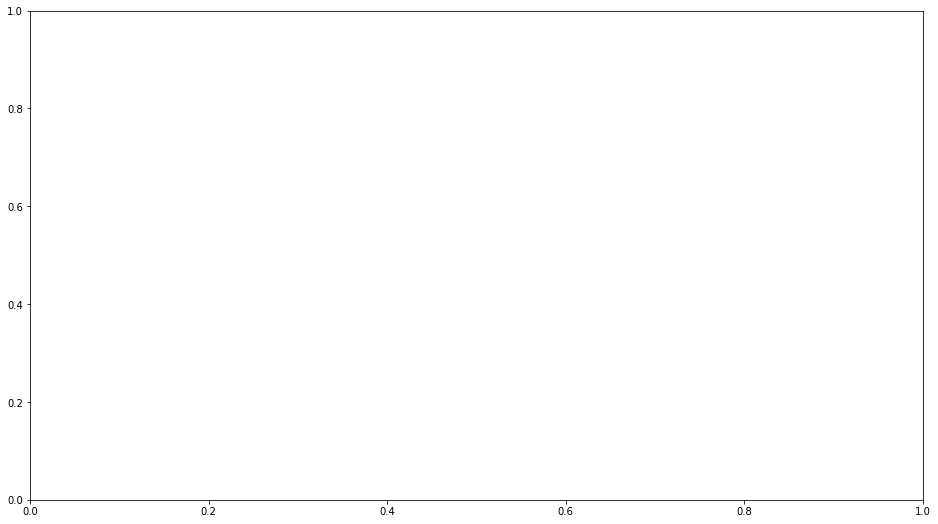

In [38]:
balanco = balanco[-11:]
fig, grafico, cotacao_graph = plt.subplots(figsize=(16,9))

x = np.arange(balanco.index.size)

grafico.plot(x, balanco["Ativo Circulante"].tolist(), label='Ativo')
grafico.plot(x, balanco["Passivo Total"].tolist(), label='Passivo')
grafico.plot(x, balanco["Patrimônio Líquido"].tolist(), label='Patrimônio')
grafico.plot(x, balanco["Lucros/Prejuízos Acumulados"].tolist(), label='Lucros/Prejuízos Acum.')

cotacao_graph.plot(706, cotacao["Último"][-706:].tolist(), label='Cot')

plt.xticks(x, balanco.index)

grafico.grid()

grafico.legend()

labels = grafico.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

grafico.set(ylabel='Valor em R$', title='Análise de balanço - VIVR3')

grafico.yaxis.set_major_formatter(formatter_money)



